In [49]:
import pandas as pd
import numpy as np

df = pd.read_csv('Mall_Customers.csv')

In [50]:
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [51]:
df.rename(columns={'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'}, inplace=True)
print(df.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')


In [52]:
df.drop('CustomerID', axis=1, inplace=True)

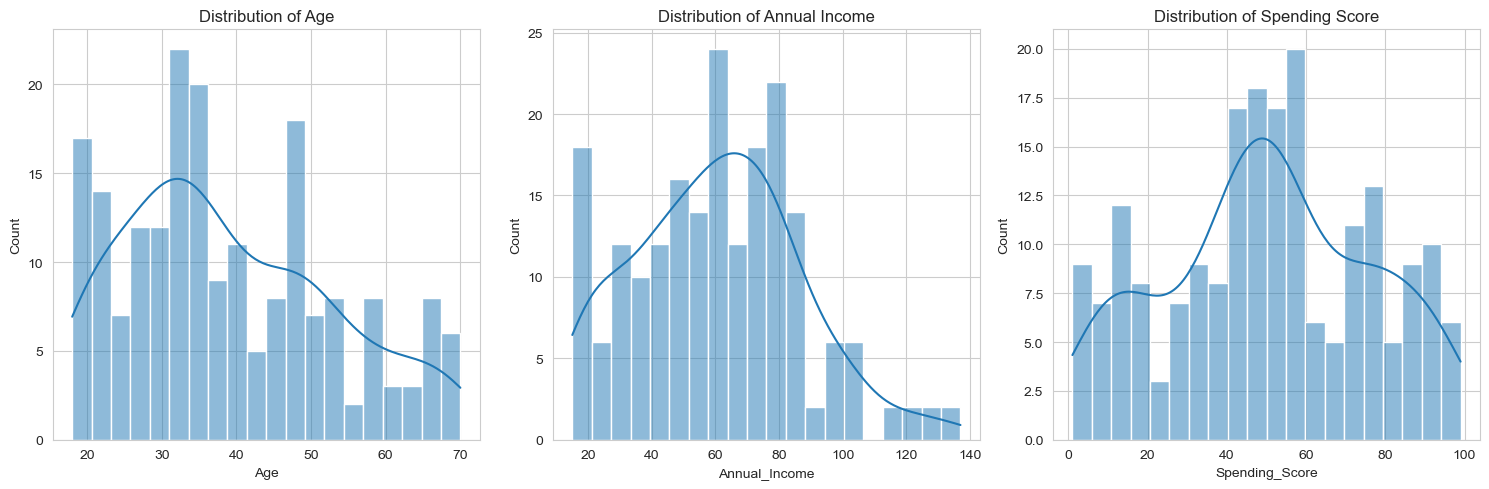

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set_style('whitegrid')

# Histograms for key features
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual_Income'], kde=True, bins=20)
plt.title('Distribution of Annual Income')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending_Score'], kde=True, bins=20)
plt.title('Distribution of Spending Score')

plt.tight_layout()
plt.show()





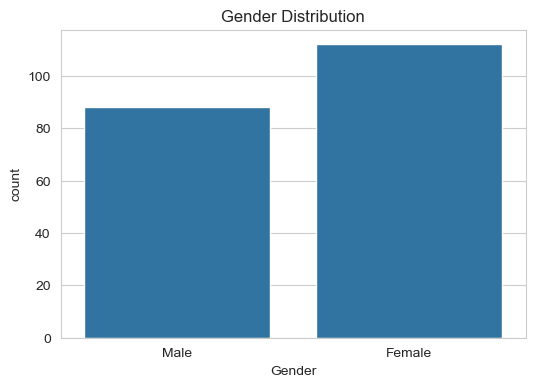

In [54]:
# Countplot for Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

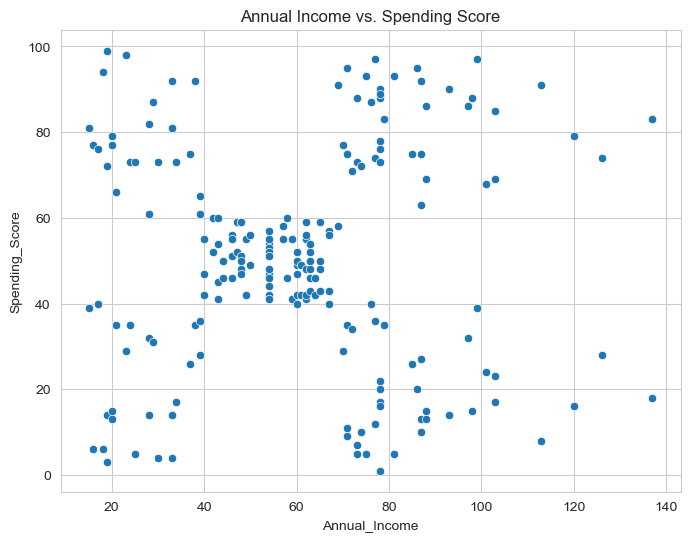

In [59]:
# Scatter plot of Annual Income vs. Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual_Income', y='Spending_Score', data=df)
plt.title('Annual Income vs. Spending Score')
plt.show()

In [66]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering
X = df[['Annual_Income', 'Spending_Score']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled[:5]) # Display the first 5 rows of the scaled data

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


C:\Users\Pravin\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Pravin\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Pravin\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Pravin\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

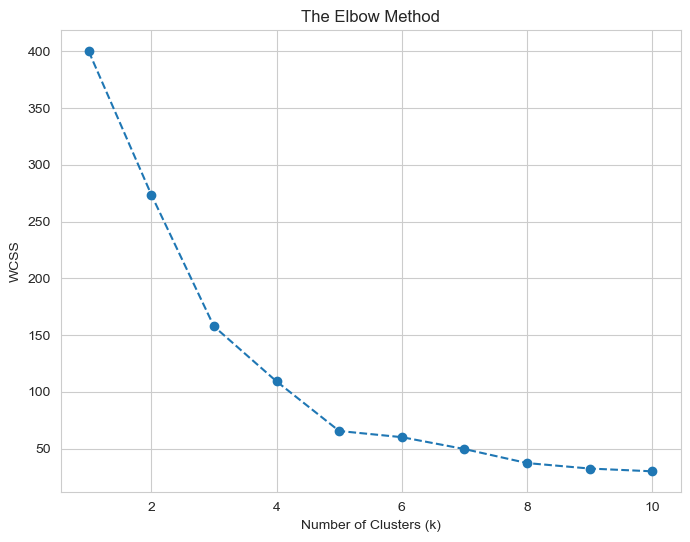

In [65]:
# Place this at the very beginning of your script
import os
os.environ['OMP_NUM_THREADS'] = '1'

# Now you can import and use scikit-learn without the warning
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assume X_scaled is already defined from your data preprocessing step
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) # inertia_ is the WCSS

# Plot the Elbow Method results
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (k)')

plt.ylabel('WCSS')
plt.show()

C:\Users\Pravin\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Pravin\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Pravin\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Pravin\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

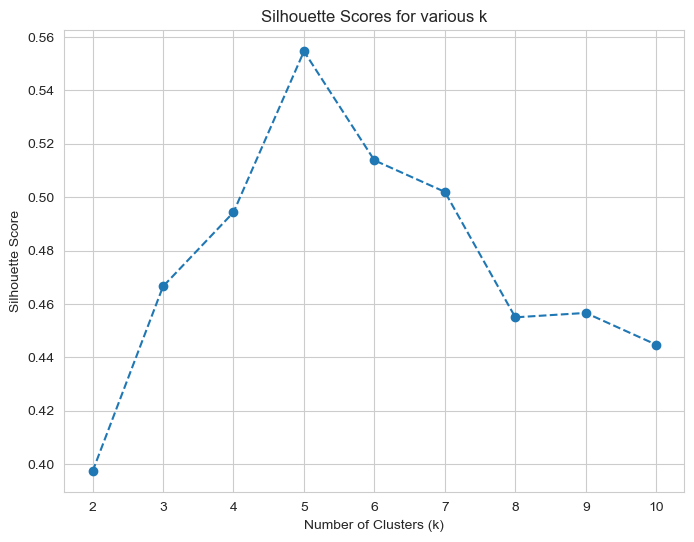

In [70]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for various k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [71]:
# Train the K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Display the cluster counts
print(df['Cluster'].value_counts())
print(df.head())

Cluster
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64
   Gender  Age  Annual_Income  Spending_Score  Cluster
0    Male   19             15              39        4
1    Male   21             15              81        2
2  Female   20             16               6        4
3  Female   23             16              77        2
4  Female   31             17              40        4


C:\Users\Pravin\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


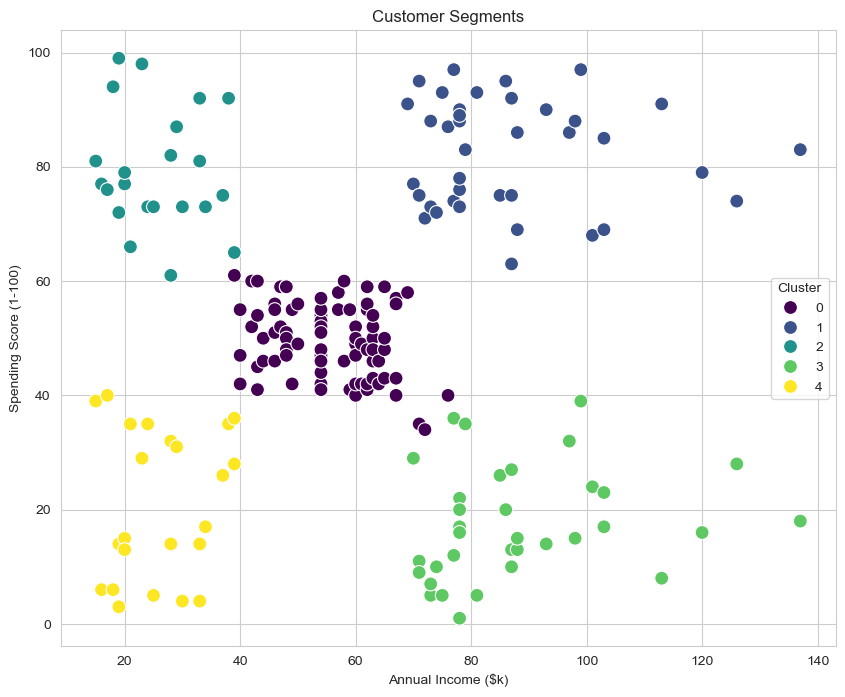

In [75]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual_Income', y='Spending_Score', hue='Cluster', data=df, palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income ($k)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [78]:
cluster_summary = df.groupby('Cluster')[['Age', 'Annual_Income', 'Spending_Score']].mean()
print(cluster_summary)

               Age  Annual_Income  Spending_Score
Cluster                                          
0        42.716049      55.296296       49.518519
1        32.692308      86.538462       82.128205
2        25.272727      25.727273       79.363636
3        41.114286      88.200000       17.114286
4        45.217391      26.304348       20.913043
